In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from OhlcvAnalyser import MultiOhlcvAnalyser, SingleOhlcvAnalyser
from OhlcvAnalyser.plotter import Plotter

In [3]:
raw_ohlcv = pd.read_csv("./data/ohlcv.csv", low_memory=False)

In [4]:
raw_ohlcv.head()

,date,open,high,low,close,volume,change,stock_code
0,2019-01-21,9660,9820,9650,9750,65445,0.011411,000020
1,2019-01-22,9750,9860,9660,9800,42143,0.005128,000020
2,2019-01-23,9840,9880,9740,9820,31492,0.002041,000020
3,2019-01-24,9820,10000,9710,10000,109714,0.018330,000020
4,2019-01-25,10000,10100,9920,9980,24176,-0.002000,000020


In [5]:
# Preprocessing
ohlcv = raw_ohlcv.copy()

## 1. date related preprocessing
ohlcv.set_index("date", inplace=True)
ohlcv.index = pd.to_datetime(ohlcv.index, format="%Y-%m-%d")

## 2. renaming columns
ohlcv.rename(columns={"stock_code": "code"}, inplace=True)

## 3. type casting
ohlcv = ohlcv.loc[:, ["open", "high", "low", "close", "volume", "code"]]
ohlcv.loc[:, ["open", "high", "low", "close", "volume"]] = ohlcv.loc[
    :, ["open", "high", "low", "close", "volume"]
].astype(float)

In [6]:
# multi ohlcv format
ohlcv.head()

,open,high,low,close,volume,code
date,,,,,,
2019-01-21,9660,9820,9650,9750,65445,000020
2019-01-22,9750,9860,9660,9800,42143,000020
2019-01-23,9840,9880,9740,9820,31492,000020
2019-01-24,9820,10000,9710,10000,109714,000020
2019-01-25,10000,10100,9920,9980,24176,000020


In [7]:
multi_ohlcv = ohlcv.copy()

In [8]:
multi_ohlcv_analyser = MultiOhlcvAnalyser(multi_ohlcv)

In [9]:
multi_ohlcv_analyser.info()

,value
total_stock_code,1537
start_date,2019-01-21 00:00:00
end_date,2024-01-17 00:00:00
market_average_profit,25.57
increased_stock_pct,45.0
decreased_stock_pct,55.0


In [10]:
analysis_df = pd.concat(
    [
        multi_ohlcv_analyser.normalized_coef("close"),
        multi_ohlcv_analyser.coef_score("close"),
        multi_ohlcv_analyser.normalized_coef("volume"),
        multi_ohlcv_analyser.coef_score("volume"),
        multi_ohlcv_analyser.profit(),
        multi_ohlcv_analyser.oc_variance(),
        multi_ohlcv_analyser.hl_variance(),
    ],
    axis=1,
)
analysis_df

,close_normalized_coef,close_coef_score,volume_normalized_coef,volume_coef_score,profit,oc_variance,hl_variance
code,,,,,,,
000020,-0.000091,0.008613,-0.000834,0.008976,1.538,0.000887,0.000978
000050,0.000011,0.000521,-0.001330,0.018622,-21.256,0.000495,0.000516
000070,0.000059,0.008415,-0.000312,0.005120,-23.317,0.000432,0.000308
000075,0.000228,0.177642,-0.001516,0.009673,9.644,0.000317,0.000485
000080,-0.000074,0.012689,-0.000526,0.060013,32.609,0.000351,0.000214
...,...,...,...,...,...,...,...
900310,-0.000563,0.521512,0.000327,0.001542,-52.928,0.001145,0.001250
900340,-0.000734,0.746107,-0.000959,0.015580,-50.268,0.001048,0.001294
950110,-0.000950,0.784995,-0.001433,0.014497,-68.015,0.000628,0.000669


In [11]:
end_date = dt.datetime.today()
start_date = end_date - dt.timedelta(days=60)

In [12]:
multi_ohlcv_analyser.info(start=start_date, end=end_date)

,value
total_stock_code,1537
start_date,2023-12-04 00:00:00
end_date,2024-01-17 00:00:00
market_average_profit,-0.19
increased_stock_pct,36.0
decreased_stock_pct,64.0


In [13]:
recent_analysis_df = pd.concat(
    [
        multi_ohlcv_analyser.normalized_coef(
            "close", start=start_date, end=end_date
        ),
        multi_ohlcv_analyser.coef_score(
            "close", start=start_date, end=end_date
        ),
        multi_ohlcv_analyser.normalized_coef(
            "volume", start=start_date, end=end_date
        ),
        multi_ohlcv_analyser.coef_score(
            "volume", start=start_date, end=end_date
        ),
        multi_ohlcv_analyser.profit(start=start_date, end=end_date),
        multi_ohlcv_analyser.oc_variance(start=start_date, end=end_date),
        multi_ohlcv_analyser.hl_variance(start=start_date, end=end_date),
    ],
    axis=1,
)
recent_analysis_df

,close_normalized_coef,close_coef_score,volume_normalized_coef,volume_coef_score,profit,oc_variance,hl_variance
code,,,,,,,
000020,0.003199,0.604319,-0.046803,0.048791,5.882,0.000199,0.000174
000050,0.000807,0.285910,0.034059,0.144403,0.920,0.000339,0.000218
000070,-0.002102,0.552736,0.010062,0.011441,-8.201,0.000109,0.000059
000075,-0.001366,0.567607,-0.053853,0.265134,-1.876,0.000085,0.000078
000080,-0.002486,0.613689,-0.003981,0.006474,-6.154,0.000131,0.000053
...,...,...,...,...,...,...,...
900310,-0.000633,0.180481,0.006677,0.018059,-4.804,0.000180,0.000090
900340,-0.001434,0.585016,-0.006808,0.008307,-7.606,0.000112,0.000225
950110,-0.000435,0.020018,-0.081391,0.039938,-1.806,0.000324,0.001450


In [14]:
# Example
## my condition

selected_codes_v1 = analysis_df[
    (-20 <= analysis_df["profit"]) & (analysis_df["profit"] <= 100)
].index

selected_codes_v2 = recent_analysis_df[
    (0 <= recent_analysis_df["volume_normalized_coef"])
    & (-30 <= recent_analysis_df["profit"])
    & (recent_analysis_df["profit"] <= 60)
].index

In [15]:
selected_codes = set(selected_codes_v1) & set(selected_codes_v2)

In [16]:
selected_multi_ohlcv = multi_ohlcv[
    multi_ohlcv['code'].isin(selected_codes)
].copy()

In [17]:
single_ohlcv = multi_ohlcv[multi_ohlcv['code'] == list(selected_codes)[0]].copy()

In [18]:
single_ohlcv_analyser = SingleOhlcvAnalyser(single_ohlcv)

In [19]:
def get_info_df(single_ohlcv_analyser, start_date, end_date):
    info_df = pd.concat(
        [
            single_ohlcv_analyser.info().T,
            single_ohlcv_analyser.info(start=start_date, end=end_date).T,
        ],
        axis=0,
    )
    return info_df


def get_price_rank_df(single_ohlcv_analyser, start_date, end_date):
    price_rank_df = pd.concat(
        [
            single_ohlcv_analyser.get_price_rank_series(
                start=end_date - dt.timedelta(days=idx + 30),
                end=end_date,
                price=single_ohlcv_analyser.ohlcv["close"].iloc[-1],
            )
            .to_frame()
            .T
            for idx in [0, 30, 60, 90]
        ]
    )
    return price_rank_df


def get_coefficient_df(single_ohlcv_analyser, arg, start_date, end_date):
    coefficient_df = pd.concat(
        [
            single_ohlcv_analyser.get_coefficient_series(
                arg=arg,
                start=end_date - dt.timedelta(days=idx + 30),
                end=end_date,
            )
            .to_frame()
            .T
            for idx in [0, 30, 60, 90]
        ]
    )
    return coefficient_df

In [20]:
info_df = get_info_df(
    single_ohlcv_analyser, start_date=start_date, end_date=end_date
)
info_df

,stock_code,start_date,end_date,start_end_profit,start_max_profit,start_min_profit
value,005430,2019-01-21 00:00:00,2024-01-17 00:00:00,20.609,32.553,-51.405
value,005430,2023-12-04 00:00:00,2024-01-17 00:00:00,13.311,16.832,-2.53


In [21]:
price_rank_df = get_price_rank_df(
    single_ohlcv_analyser, start_date=start_date, end_date=end_date
)
price_rank_df

,start_date,date_diff,end_date,price,mean_price,price_rank
0,2024-01-01,30,2024-01-31,51500,51541.85,46.28
0,2023-12-02,60,2024-01-31,51500,49367.9,21.14
0,2023-11-02,90,2024-01-31,51500,46550.56,9.39
0,2023-10-03,120,2024-01-31,51500,45732.85,8.58


In [22]:
close_coefficient_df = get_coefficient_df(
    single_ohlcv_analyser,
    arg="close",
    start_date=start_date,
    end_date=end_date,
)
close_coefficient_df

,start_date,date_diff,end_date,arg,coefficient
0,2024-01-01,30,2024-01-31,close,0.003047
0,2023-12-02,60,2024-01-31,close,0.005684
0,2023-11-02,90,2024-01-31,close,0.004892
0,2023-10-03,120,2024-01-31,close,0.00478


In [23]:
volume_coefficient_df = get_coefficient_df(
    single_ohlcv_analyser,
    arg="volume",
    start_date=start_date,
    end_date=end_date,
)
volume_coefficient_df

,start_date,date_diff,end_date,arg,coefficient
0,2024-01-01,30,2024-01-31,volume,-0.00672
0,2023-12-02,60,2024-01-31,volume,0.010726
0,2023-11-02,90,2024-01-31,volume,-0.017978
0,2023-10-03,120,2024-01-31,volume,0.006795


In [24]:
from tqdm import tqdm

In [25]:
info_df_list = list()
price_rank_df_list = list()
coefficent_df_list = list()

for selected_code in tqdm(selected_codes):
    single_ohlcv = multi_ohlcv[multi_ohlcv["code"] == selected_code].copy()
    single_ohlcv_analyser = SingleOhlcvAnalyser(single_ohlcv)

    # Info
    info_df = get_info_df(
        single_ohlcv_analyser, start_date=start_date, end_date=end_date
    )
    info_df["code"] = selected_code
    info_df_list.append(info_df)
    # Price Rank
    price_rank_df = get_price_rank_df(
        single_ohlcv_analyser, start_date=start_date, end_date=end_date
    )
    price_rank_df["code"] = selected_code
    price_rank_df_list.append(price_rank_df)
    # Coefficient
    ## Close
    close_coefficient_df = get_coefficient_df(
        single_ohlcv_analyser,
        arg="close",
        start_date=start_date,
        end_date=end_date,
    )
    coefficent_df_list.append(close_coefficient_df)
    close_coefficient_df["code"] = selected_code
    ## Volume
    volume_coefficient_df = get_coefficient_df(
        single_ohlcv_analyser,
        arg="volume",
        start_date=start_date,
        end_date=end_date,
    )
    volume_coefficient_df["code"] = selected_code
    coefficent_df_list.append(volume_coefficient_df)

100%|██████████| 348/348 [00:22<00:00, 15.46it/s]


In [26]:
info_df = pd.concat(info_df_list, axis=0)
price_rank_df = pd.concat(price_rank_df_list, axis=0)
coefficent_df = pd.concat(coefficent_df_list, axis=0)

In [27]:
info_df['start_date'] = info_df['start_date'].apply(lambda x : x)
info_df['end_date'] = info_df['end_date'].apply(lambda x : x)

In [28]:
close_coefficient_df = coefficent_df[coefficent_df["arg"] == "close"].copy()
volume_coefficient_df = coefficent_df[coefficent_df["arg"] == "volume"].copy()

In [29]:
from OhlcvAnalyser.analyser import CoefficientAnalyser

In [30]:
close_coef_coef_df = close_coefficient_df.groupby("code")["coefficient"].apply(
    lambda x: CoefficientAnalyser.get_normalized_coefficient(x)
)
close_coef_coef_positive_codes = close_coef_coef_df[
    close_coef_coef_df > 0
].index

volume_coef_coef_df = volume_coefficient_df.groupby("code")[
    "coefficient"
].apply(lambda x: CoefficientAnalyser.get_normalized_coefficient(x))
volume_coef_coef_positive_codes = volume_coef_coef_df[
    volume_coef_coef_df > 0
].index

In [31]:
len(set(close_coef_coef_positive_codes) & set(volume_coef_coef_positive_codes))

20

In [32]:
price_rank_coef_df = price_rank_df.groupby("code")["price_rank"].apply(
    lambda x: CoefficientAnalyser.get_normalized_coefficient(x)
)

price_rank_coef_positive = price_rank_coef_df[price_rank_coef_df > 0].index

In [33]:
len(set(close_coef_coef_positive_codes) & set(volume_coef_coef_positive_codes) & set(price_rank_coef_positive))

3

In [34]:
finally_selected_codes = (set(close_coef_coef_positive_codes) & set(volume_coef_coef_positive_codes) & set(price_rank_coef_positive))

217820


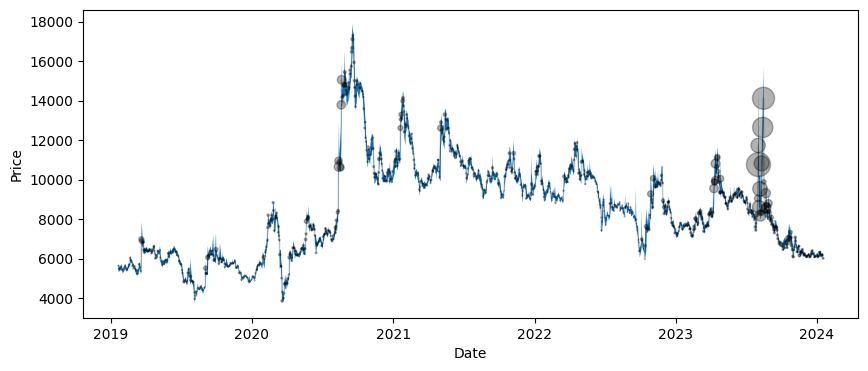

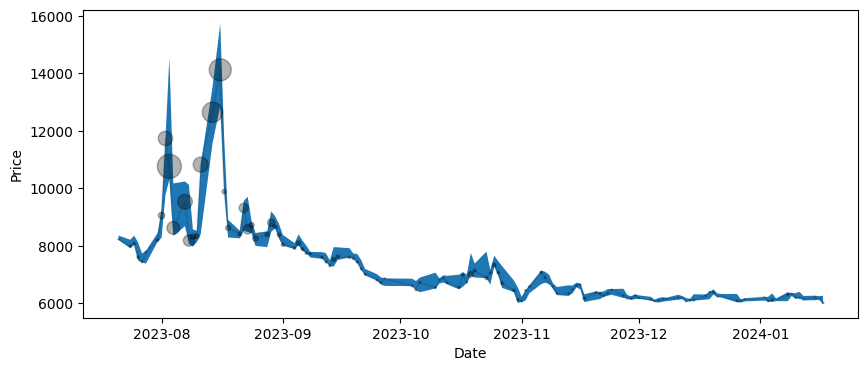

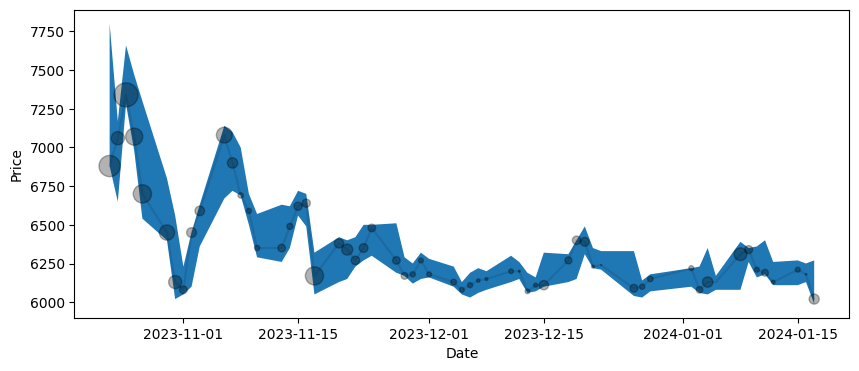

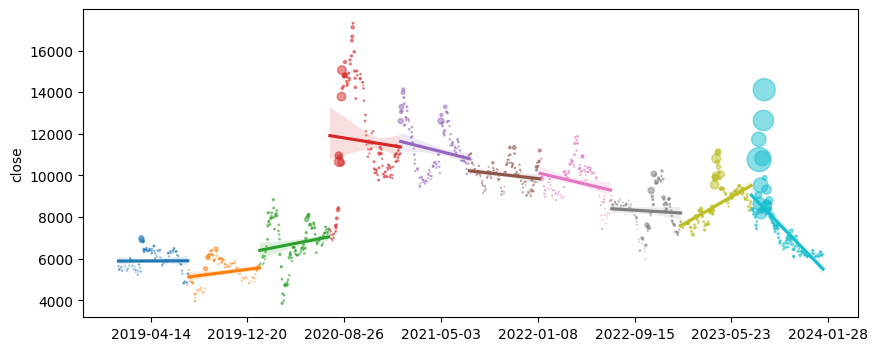

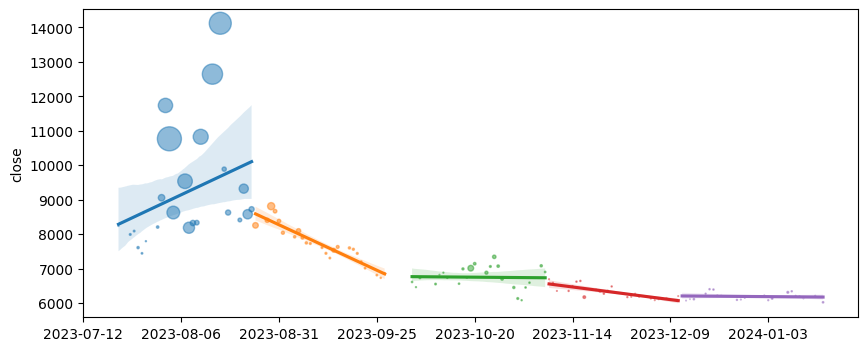

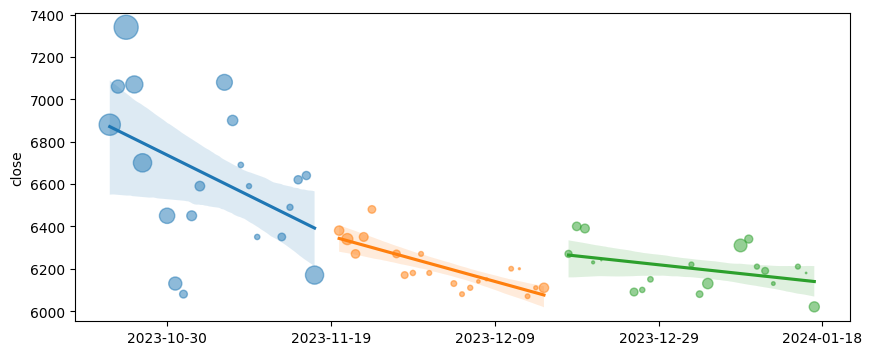

003480


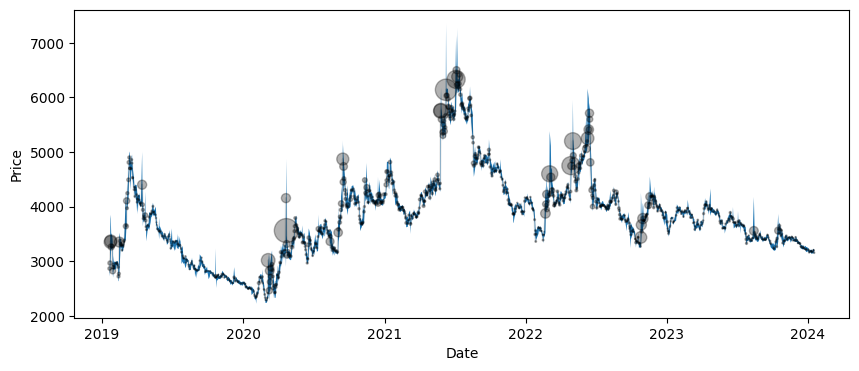

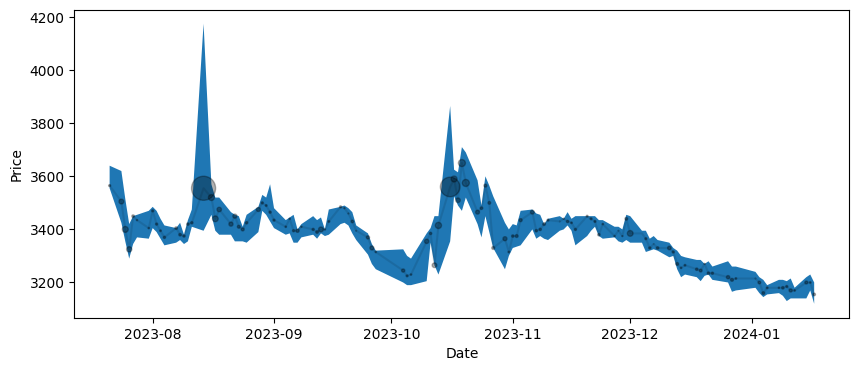

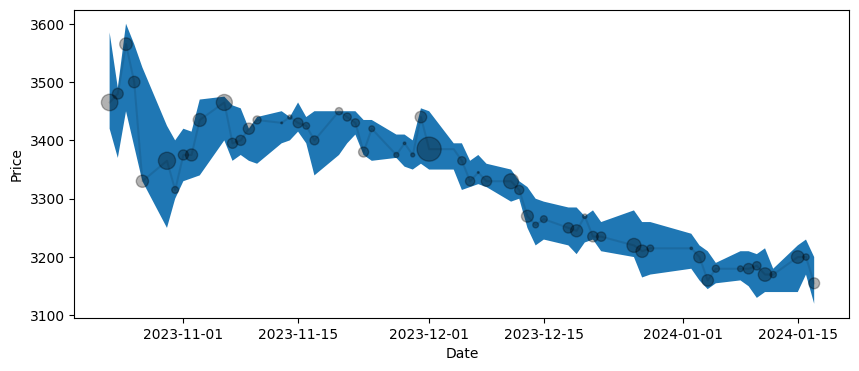

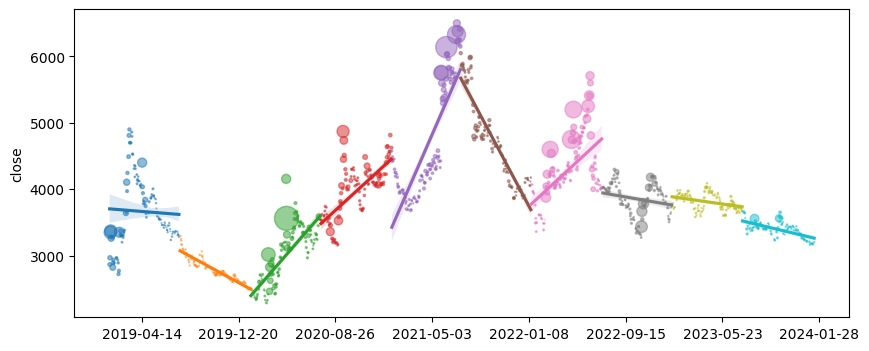

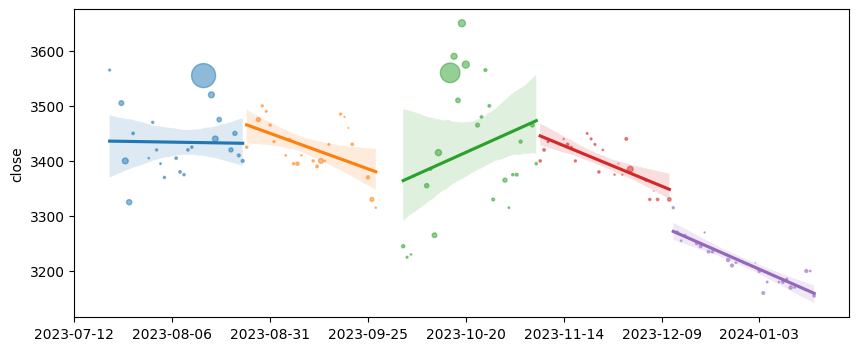

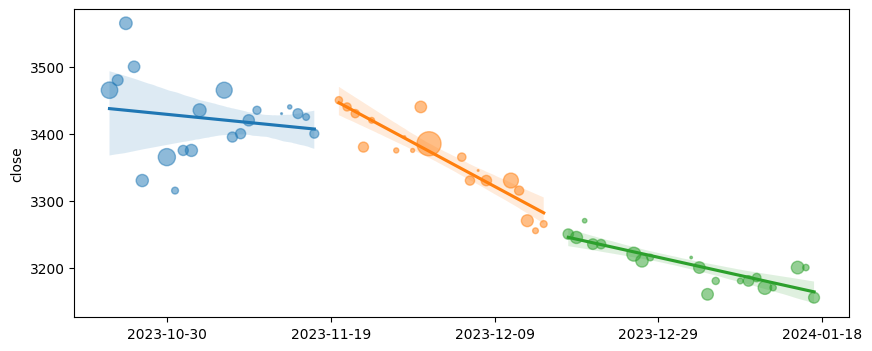

087260


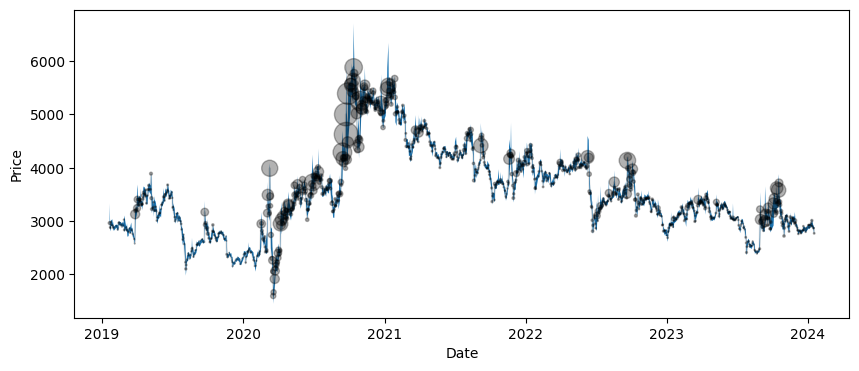

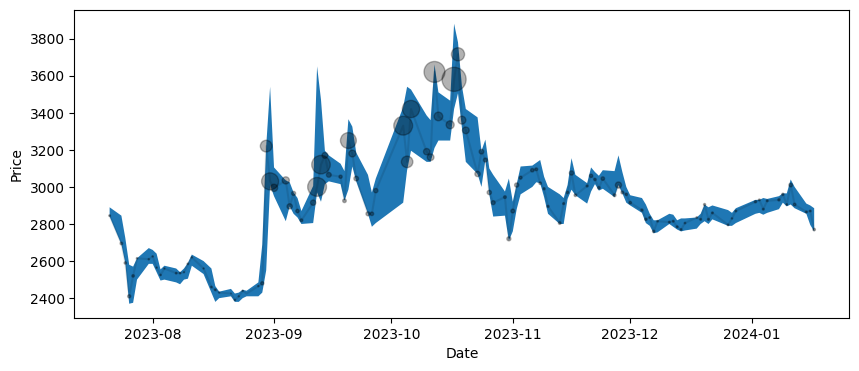

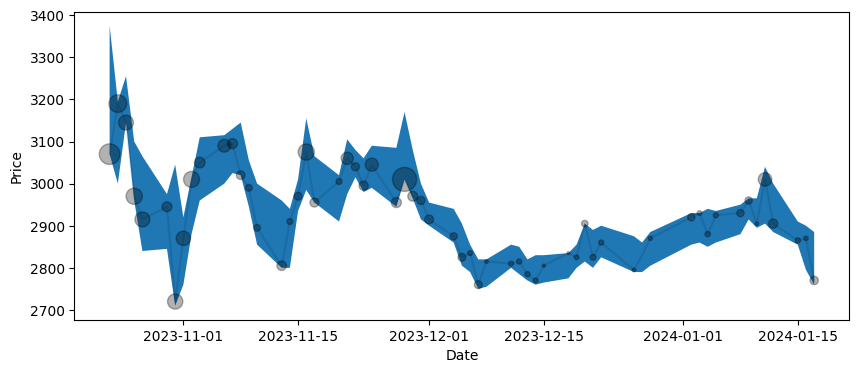

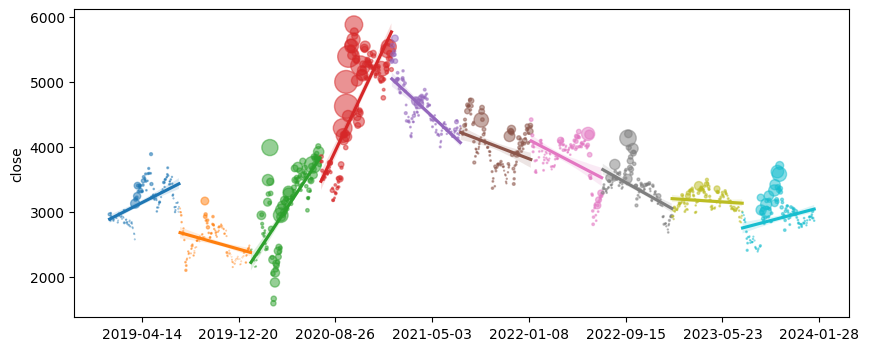

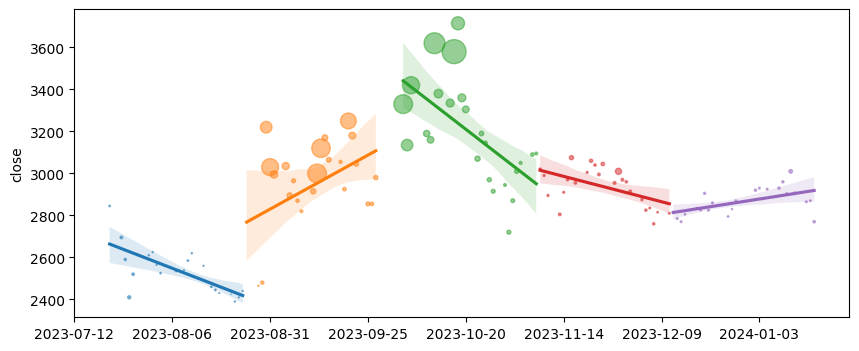

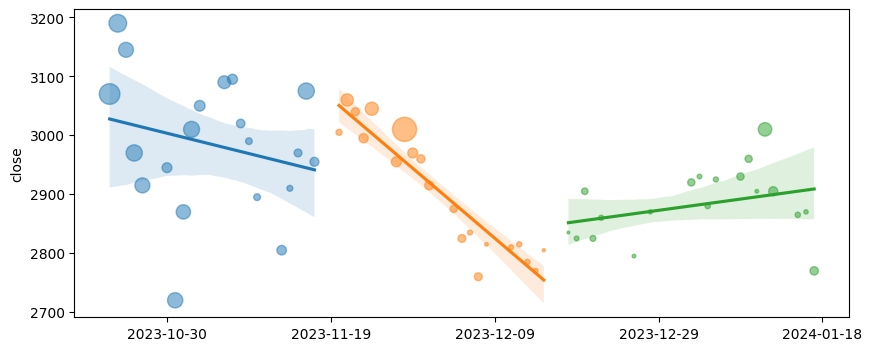

In [35]:
for finally_selected_code in finally_selected_codes:
    single_ohlcv = multi_ohlcv[multi_ohlcv["code"] == finally_selected_code]
    print(finally_selected_code)
    fig, ax = plt.subplots(figsize=(10, 4))
    Plotter.general_ohlcv_plot(ax=ax, ohlcv=single_ohlcv)
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 4))
    Plotter.general_ohlcv_plot(ax=ax, ohlcv=single_ohlcv.tail(120))
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 4))
    Plotter.general_ohlcv_plot(ax=ax, ohlcv=single_ohlcv.tail(60))
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 4))
    Plotter.draw_regression_plot(ax=ax, ohlcv=single_ohlcv, slice=10)
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 4))
    Plotter.draw_regression_plot(ax=ax, ohlcv=single_ohlcv.tail(120), slice=5)
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 4))
    Plotter.draw_regression_plot(ax=ax, ohlcv=single_ohlcv.tail(60), slice=3)
    plt.show()
    print("==" * 30)
    print("==" * 30)
    print("==" * 30)